<a href="https://colab.research.google.com/github/sheikhi-a/Big-data-with-Python/blob/main/Big_Data_spark1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq


openjdk-8-jdk-headless is already the newest version (8u432-ga~us1-0ubuntu2~22.04).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [4]:
from pyspark.sql import SparkSession


spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()


print(spark)
spark


In [86]:

data = [('Scott', 50), ('Jeff', 45), ('Thomas', 54),('Ann',34)]
df_spark=spark.createDataFrame(data,["name","age"])


df_spark.printSchema()  # same as describe

df_spark.show() #

sparkDF=df_spark

print(df_spark.count(), len(df_spark.columns))


root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)

+------+---+
|  name|age|
+------+---+
| Scott| 50|
|  Jeff| 45|
|Thomas| 54|
|   Ann| 34|
+------+---+

4 2


# Compare  equivalency of  some pandas and pyspark scripts

In [87]:

#import pandas as pd
#from pyspark.sql import SparkSession
#from pyspark.sql.functions import col


df_pd = pd.DataFrame(data)

df_pd.head()
df_pd.columns=['name', 'age']
df_pd.head()
df_pd

,name,age
0,Scott,50
1,Jeff,45
2,Thomas,54
3,Ann,34


In [7]:

df_spark.show()


+------+---+
|  name|age|
+------+---+
| Scott| 50|
|  Jeff| 45|
|Thomas| 54|
|   Ann| 34|
+------+---+



In [88]:


filtered_pd = df_pd[df_pd['age'] > 45]
filtered_pd
filtered_spark = df_spark.filter(df_spark['age'] > 45)
filtered_spark.show()


selected_pd = df_pd[['name']]
selected_pd
selected_spark = df_spark.select('name')
selected_spark.show()


df_pd['age_in_5_years'] = df_pd['age'] + 5
df_pd
df_spark1 = df_spark.withColumn('age_in_5_years', col('age') + 5)
df_spark1.show()


+------+---+
|  name|age|
+------+---+
| Scott| 50|
|Thomas| 54|
+------+---+

+------+
|  name|
+------+
| Scott|
|  Jeff|
|Thomas|
|   Ann|
+------+

+------+---+--------------+
|  name|age|age_in_5_years|
+------+---+--------------+
| Scott| 50|            55|
|  Jeff| 45|            50|
|Thomas| 54|            59|
|   Ann| 34|            39|
+------+---+--------------+



In [ ]:

df_pd_drop = df_pd.drop(columns=['age'])
df_pd_drop
df_spark = df_spark1.drop('age')
df_spark.show()


sorted_pd = df_pd_drop.sort_values(by='age_in_5_years', ascending=False)
sorted_pd
sorted_spark = df_spark.orderBy('age_in_5_years', ascending=False)
sorted_spark.show()


pd_to_list = df_pd_drop.values.tolist()
print(pd_to_list)

spark_to_list = df_spark.collect()  # Returns a list of Row objects
print(spark_to_list)


row_count_pd = len(df_pd)
row_count_pd
row_count_spark = df_spark.count()
row_count_spark


df_spark_to_pd_converted = df_spark.toPandas()
df_spark_to_pd_converted

df_pd_to_spark_converted = spark.createDataFrame(df_pd)
df_pd_to_spark_converted.show()


In [99]:
df_sp = spark.read.csv('Book1.csv', header=True)
df_pd=pd.read_csv('Book1.csv')
df_pd.shape
print(df_sp.count(), len(df_sp.columns))
df_sp.show()
df_sp.printSchema()
df.show()


root
 |-- Account: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Revenue: string (nullable = true)



In [ ]:
df = spark.read.csv('/content/sample_data/mnist_test.csv')
df.show()
df.dtypes #same as pandas

In [132]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()



pd_BC = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
pd_BC.shape
pd_BC.columns



datacancer = spark.createDataFrame(pd_BC)
datacancer.show(5)

datacancer.printSchema()

datacancer.count()

len(datacancer.columns)

print( datacancer.count(),len(datacancer.columns ))

MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
            (             'worst a

Show in Panads format

In [115]:
pd_datacancer = datacancer.toPandas()
pd_datacancer.head()



,"('mean radius',)","('mean texture',)","('mean perimeter',)","('mean area',)","('mean smoothness',)","('mean compactness',)","('mean concavity',)","('mean concave points',)","('mean symmetry',)","('mean fractal dimension',)",...,"('worst radius',)","('worst texture',)","('worst perimeter',)","('worst area',)","('worst smoothness',)","('worst compactness',)","('worst concavity',)","('worst concave points',)","('worst symmetry',)","('worst fractal dimension',)"
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


convert and save to CSV

In [121]:
datacancer.toPandas().to_csv('cancerB.csv')


datacancer_pd=datacancer.toPandas()
datacancer_pd.head(10).to_csv("datacancer_head.csv")
datacancer_pd.tail(10).to_csv("datacancer_tail.csv")



In [138]:
datacancer.printSchema()


datacancer.schema.names
datacancer.schema.names

datacancer.describe().show()

datacancer.show()
print(( datacancer.count(),len(datacancer.columns )))

datacancer1 = datacancer.withColumnRenamed("mean radius", "m_radius") # not work!
datacancer1.schema.names
datacancer1 = datacancer.withColumnRenamed("('mean radius',)", "m_radius")
datacancer1.schema.names

datacancer1 = datacancer1.withColumnRenamed("('mean texture',)", "m_texture")
datacancer1.schema.names


df1=datacancer1.filter((datacancer1.m_radius > 10) & (datacancer1.m_texture >17))

datacancer1.count()
df1.count()
datacancer1.show(5)
df1.show(5)

+--------+---------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+
|m_radius|m_texture|('mean perimeter',)|('mean area',)|('mean smoothness',)|('mean compactness',)|('mean concavity',)|('mean concave points',)|('mean symmetry',)|('mean fractal dimension',)|('radius error',)|('texture error',)|('perimeter error',)|('area error',)|('smoothness error',)|('compactness error',)|('concavity error',)|('concave points error',)|('symmetry error',)|('f

In [157]:
from pyspark.sql import functions as F
from pyspark.sql.types import *

def func(numbers):
    if numbers<15:
      return 'benign'
    else:
     return 'Melignant'

func(30)
func_udf = F.udf(func, StringType())
func_udf(func(30))



datacancer_sel=datacancer1.select('m_radius', 'm_texture')
datacancer_sel.show()


newdatacancer=datacancer_sel.withColumn('cancer', func_udf(datacancer_sel['m_radius']))
newdatacancer.show()

+--------+---------+---------+
|m_radius|m_texture|   cancer|
+--------+---------+---------+
|   17.99|    10.38|Melignant|
|   20.57|    17.77|Melignant|
|   19.69|    21.25|Melignant|
|   11.42|    20.38|   benign|
|   20.29|    14.34|Melignant|
|   12.45|     15.7|   benign|
|   18.25|    19.98|Melignant|
|   13.71|    20.83|   benign|
|    13.0|    21.82|   benign|
|   12.46|    24.04|   benign|
|   16.02|    23.24|Melignant|
|   15.78|    17.89|Melignant|
|   19.17|     24.8|Melignant|
|   15.85|    23.95|Melignant|
|   13.73|    22.61|   benign|
|   14.54|    27.54|   benign|
|   14.68|    20.13|   benign|
|   16.13|    20.68|Melignant|
|   19.81|    22.15|Melignant|
|   13.54|    14.36|   benign|
+--------+---------+---------+
only showing top 20 rows



In [151]:
newdatacancer.groupby('cancer').count().show()


+---------+-----+
|   cancer|count|
+---------+-----+
|   benign|  395|
|Melignant|  174|
+---------+-----+



In [159]:
newdatacancer.groupby('cancer').agg({'m_radius' : 'mean'}).show()

newdatacancer.groupby('cancer').agg({'m_texture' : 'mean'}).show()

newdatacancer.groupby('cancer').agg({'m_texture' : 'variance'}).show()


+---------+-------------------+
|   cancer|variance(m_texture)|
+---------+-------------------+
|   benign| 16.179269823298846|
|Melignant| 18.340778968174877|
+---------+-------------------+



Select the patients that their radius and texture are greater than the mean of all patients

In [172]:
datacancer_sel.show(3)
data_colmean = datacancer_sel.withColumn('colmean',((datacancer_sel['m_radius'] +datacancer_sel['m_texture'])/2))
data_colmean.show(10)

mean_of_radius_and_texture=data_colmean.agg({'colmean':'mean'})
mean_of_radius_and_texture.show()
mean_of_radius_and_texture.columns
mean_of_radius_and_texture.show()
value_of_avg=mean_of_radius_and_texture.select('avg(colmean)').collect()[0][0]

badcancer=data_colmean.filter(data_colmean.colmean>value_of_avg )

badcancer.show(10)


+--------+---------+------------------+
|m_radius|m_texture|           colmean|
+--------+---------+------------------+
|   17.99|    10.38|14.184999999999999|
|   20.57|    17.77|             19.17|
|   19.69|    21.25|             20.47|
|   11.42|    20.38|15.899999999999999|
|   20.29|    14.34|17.314999999999998|
|   12.45|     15.7|            14.075|
|   18.25|    19.98|19.115000000000002|
|   13.71|    20.83|             17.27|
|    13.0|    21.82|             17.41|
|   12.46|    24.04|             18.25|
+--------+---------+------------------+
only showing top 10 rows



Text(0.5, 1.0, 'Number of rows per species')

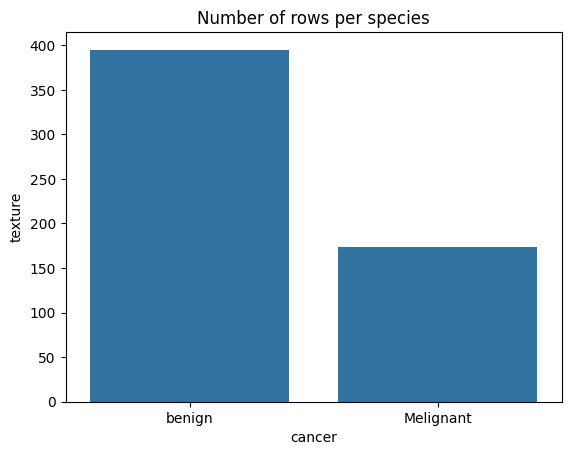

In [180]:
newdatacancer.show()
data = newdatacancer.groupby('cancer').count().toPandas()
data


import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot( x = data['cancer'], y = data['count'])
plt.xlabel('cancer')
plt.ylabel('texture')
plt.title('Number of rows per species')






(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

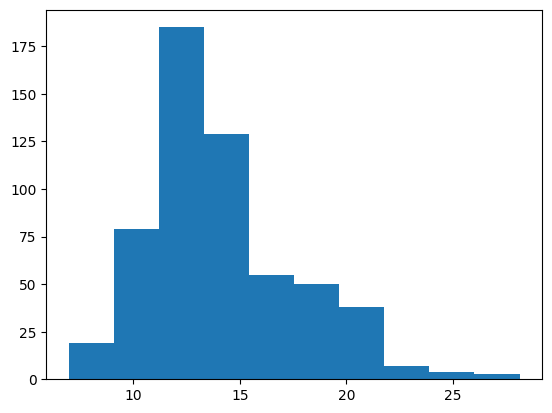

In [181]:
data1 = newdatacancer.toPandas()

data1.columns

import matplotlib.pyplot as plt
plt.hist(data1.m_radius)